# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


 ## Предобработка данных 


### Загрузим необходимые для работы библиотеки, посмотрим на данные и переименуем столбцы:

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [5]:
# заменим пробелы в названиях столбцов на нижнее подчеркивание
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower() 

- Исследуем таблицу visits:

In [6]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
#уникальные значения столбца region
visits.region.value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [8]:
#уникальные значения столбца device
visits.device.value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [9]:
#уникальные значения столбца channel
visits.channel.value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [10]:
orders.info()
orders.describe()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
#идентификатор рекламного источника
costs.channel.value_counts()

TipTop                180
OppleCreativeMedia    180
lambdaMediaAds        180
FaceBoom              180
YRabbit               180
LeapBob               180
RocketSuperAds        180
AdNonSense            180
MediaTornado          180
WahooNetBanner        180
Name: channel, dtype: int64


### Преобразование данных о времени

In [13]:
# перевод значений столбцов из строки в дату
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date



In [14]:
# visits.dtypes
orders.dtypes
#costs.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object


### Ищем пропуски и дубликаты

In [15]:
#функция для выяления пропусков в таблицах:
def null_values(data):
    for column in data.columns:
        isnull_count = data[column].isna().value_counts()
        print('Количество пропусков в', column, ': ', len(data) - isnull_count[0])        

In [16]:
null_values(visits)

Количество пропусков в user_id :  0
Количество пропусков в region :  0
Количество пропусков в device :  0
Количество пропусков в channel :  0
Количество пропусков в session_start :  0
Количество пропусков в session_end :  0


In [17]:
null_values(orders)

Количество пропусков в user_id :  0
Количество пропусков в event_dt :  0
Количество пропусков в revenue :  0


In [18]:
null_values(costs)

Количество пропусков в dt :  0
Количество пропусков в channel :  0
Количество пропусков в costs :  0


In [19]:
visits.duplicated().sum()

0

In [20]:
orders.duplicated().sum()

0

In [21]:
costs.duplicated().sum()

0


### Вывод
В исследовании используются данные трех таблиц с информацией о посещениях сайта, информацией о заказах и информацией о затратах на маркетинг.

Анализ проводится по 4 странам: США, Великобритания, Франция и Германия. 
Категории устройств пользователeй: iPhone, Android, PC, Mac.

Названия столбцов имеют заглавные буквы и пробелы, поэтому они были заменены на строчные буквы и нижнее подчеркивание.
Значения столбцов с датами были преобразованы из строк в datetime64.

Пропущенные и дублирующиеся значения в таблицах отсутствуют.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Комментарий ревьюера, ревью 1</b> 

    
Ты тщательно изучила данные и сделала все неоходимые преобразования.


## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [22]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Retention')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Retention')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Retention')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Retention')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Динамика изменения конверсии')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Динамика изменения конверсии')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Стоимость привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.ylabel('Процент окупаемости')
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Созданы функции для расчета и анализа LTV (Lifetime Value, пожизненная ценность), ROI (Return On Investment, окупаемость инвестиций), Retention Rate (коэффициент удержания) и Conversion Rate (коэффициент конверсии).

LTV - общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок.

ROI - на сколько процентов LTV превысил CAC (Customer Acquisition Cost, стоимость привлечения одного клиента).

Retention Rate показывает, как долго клиенты остаются с компанией.

CR - процент пользователей когорты, совершивших какое-нибудь действие (оплату покупки).


## Исследовательский анализ данных



### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [30]:
profiles = get_profiles(visits,orders, None, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [31]:
observation_date = datetime(2019, 11, 1).date()

In [32]:
#минимальная дата привлечения пользователей
min_dt = profiles['dt'].min()
min_dt


datetime.date(2019, 5, 1)

In [33]:
#максимаьная дата привлечения пользователей
max_dt = profiles['dt'].max()
max_dt

datetime.date(2019, 10, 27)

In [34]:
# горизонт анализа
horizon_days = 14

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [36]:
visits['session_month'] = visits['session_start'].astype('datetime64[M]')


In [37]:
visits['session_week'] = visits['session_start'].astype('datetime64[W]')
visits['session_date'] = visits['session_start'].dt.date

In [38]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [39]:
profiles_pay_region = (
    profiles.query('payer == True')
    .groupby('region')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
 
profiles_pay_region['total'] = (
    profiles
    .groupby('region')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
 
profiles_pay_region = profiles_pay_region.rename(columns={'user_id': 'payer'})
 
profiles_pay_region['percent'] = round((profiles_pay_region['payer']/profiles_pay_region['total']) * 100,2)
profiles_pay_region

,payer,total,percent
region,,,
United States,6902,100002,6.90
UK,700,17575,3.98
France,663,17450,3.80
Germany,616,14981,4.11


### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [40]:
# устройства и платящие пользователи
profiles_pay_device = (
    profiles.query('payer == True')
    .groupby('device')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
 
profiles_pay_device['all'] = (
    profiles
    .groupby('device')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
 
profiles_pay_device = profiles_pay_device.rename(columns={'user_id': 'payer'})
 
profiles_pay_device['percent'] = round((profiles_pay_device['payer']/profiles_pay_device['all']) * 100,2)
profiles_pay_device

,payer,all,percent
device,,,
iPhone,3382,54479,6.21
Android,2050,35032,5.85
Mac,1912,30042,6.36
PC,1537,30455,5.05


### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [41]:
# каналы и платящие пользователи
profiles_pay_channel = (
    profiles.query('payer == True')
    .groupby('channel')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
 
profiles_pay_channel['all'] = (
    profiles
    .groupby('channel')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
 
profiles_pay_channel = profiles_pay_channel.rename(columns={'user_id': 'payer'})
 
profiles_pay_channel['percent'] = round((profiles_pay_channel['payer']/profiles_pay_channel['all']) * 100,2)
profiles_pay_channel

,payer,all,percent
channel,,,
FaceBoom,3557,29144,12.20
TipTop,1878,19561,9.60
organic,1160,56439,2.06
WahooNetBanner,453,8553,5.30
AdNonSense,440,3880,11.34
RocketSuperAds,352,4448,7.91
LeapBob,262,8553,3.06
OppleCreativeMedia,233,8605,2.71
lambdaMediaAds,225,2149,10.47


### Вывод
По условиям задачи мы смотрим данные 1 ноября 2019 года.
Пользователи приходят в приложение из 4 стран: США, Великобритания, Франция и Германия. США значительно лидируют по количеству пользователей приложения Procrastinate Pro+. Также и доля платящих пользователей выше в США - почти 7%.

Клиенты пользуются такими устройствами, как iPhone, Android, Mac и PC. iPhone является самым популярным устройством среди всех клиентов, включая платящих. Доля платящих пользователей для iPhone, Android и Mac составляет 6%, для PC - 5%.

Количество рекламных источников привлечения - 10. Но больше всего пользователей  "органических", т.е. тех, которые не пришли с каких-либо рекламных источников. Они же на третьем месте по количеству платящих пользователей. Если рассматривать только рекламные источники, то наибольшее количество пользователей из FaceBoom и TipTop.

Топ 3 канала с высоким процентом платящих пользователей от всех пользователей :

FaceBoom - 12%
AdNonSense - 11%
TipTop и lambdaMediaAds - по 10%.



## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.



In [42]:
# общая сумма расходов на маркетинг
sum_cost = round(costs['costs'].sum(), 2)
sum_cost

105497.3

In [43]:
cost_channel = costs.groupby('channel').sum('costs').sort_values(by='costs',ascending=False)
cost_channel['percent'] = round((cost_channel['costs'] / sum_cost) * 100,2)
cost_channel



,costs,percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


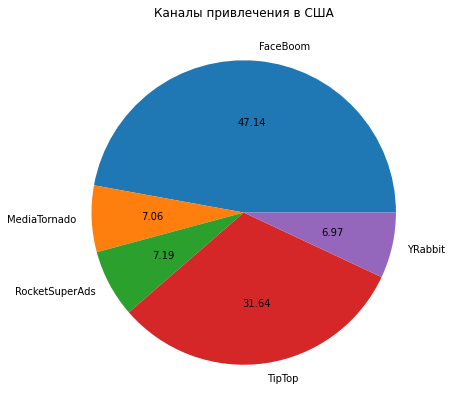

In [44]:
data = profiles.merge(cost_channel,on='channel')
data_us = data.query('region=="United States"')

x=data_us.groupby("channel")['region'].count()
data_us = x.index

plt.figure(figsize=(20,7))
plt.pie(x=x, labels=data_us, autopct="%.2f")
plt.title('Каналы привлечения в США')
plt.show()


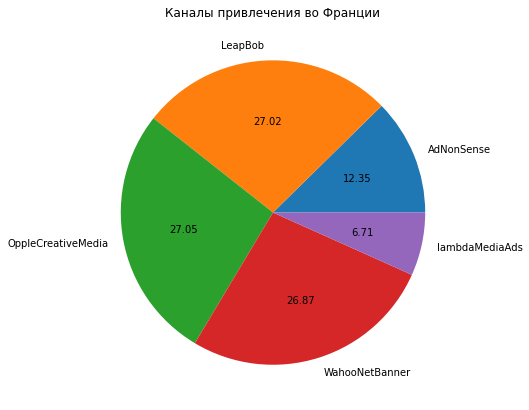

In [45]:

data_fr = data.query('region=="France"')

x=data_fr.groupby("channel")['region'].count()
data_fr = x.index

plt.figure(figsize=(20,7))
plt.pie(x=x, labels=data_fr, autopct="%.2f")
plt.title('Каналы привлечения во Франции')
plt.show()

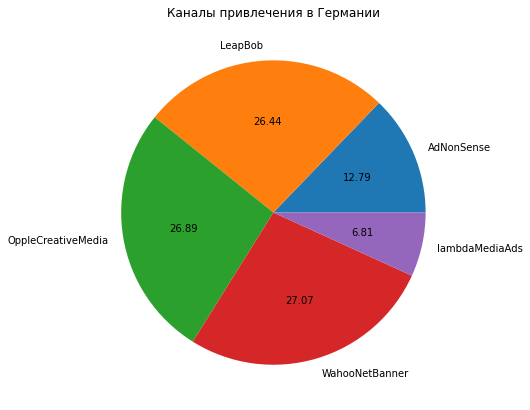

In [46]:

data_ge = data.query('region=="Germany"')

x=data_ge.groupby("channel")['region'].count()
data_ge = x.index

plt.figure(figsize=(20,7))
plt.pie(x=x, labels=data_ge, autopct="%.2f")
plt.title('Каналы привлечения в Германии')
plt.show()

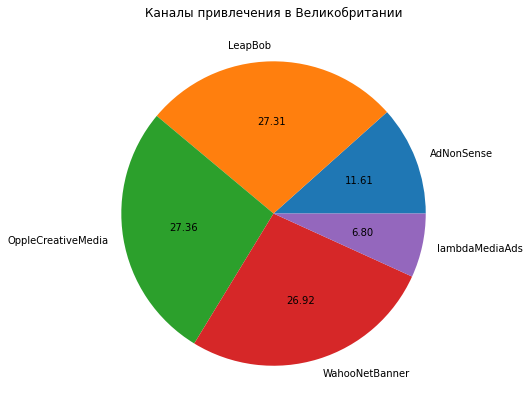

In [47]:
data_uk = data.query('region=="UK"')

x=data_uk.groupby("channel")['region'].count()
data_uk = x.index

plt.figure(figsize=(20,7))
plt.pie(x=x, labels=data_uk, autopct="%.2f")
plt.title('Каналы привлечения в Великобритании')
plt.show()

In [48]:
# создание новых столбцов и преобразование типа данных
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week


In [49]:
# потрачено всего денег по времени
costs.groupby('month').agg({'costs': 'sum'})


,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


In [50]:
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


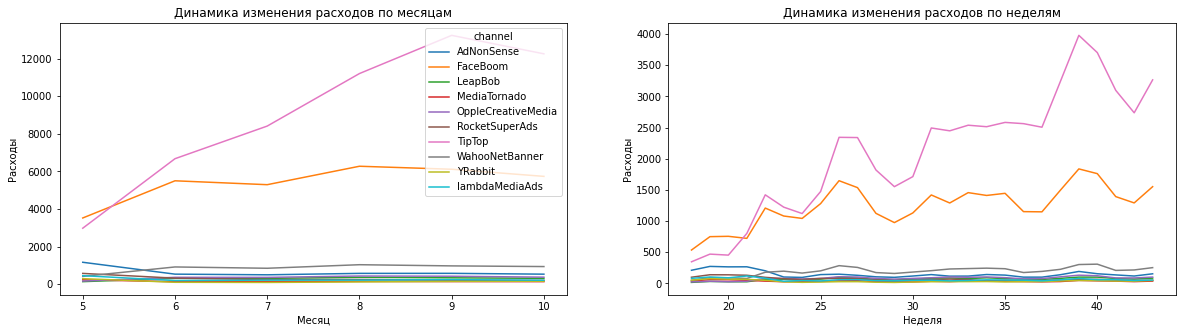

In [51]:
# визуализация изменений трат во времени
month = costs.pivot_table(index='month', columns = 'channel', values='costs', aggfunc='sum')
week = costs.pivot_table(index='week', columns = 'channel', values='costs', aggfunc='sum')

 
fig,ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(month)
ax[0].legend(labels=month.columns, title=month.columns.name, loc = 'upper right')
ax[0].set(title = 'Динамика изменения расходов по месяцам', xlabel = 'Месяц', ylabel = 'Расходы')


ax[1].plot(week)
ax[0].legend(labels=week.columns, title=week.columns.name, loc = 'upper right')
ax[1].set(title = 'Динамика изменения расходов по неделям', xlabel = 'Неделя', ylabel = 'Расходы')
plt.show()


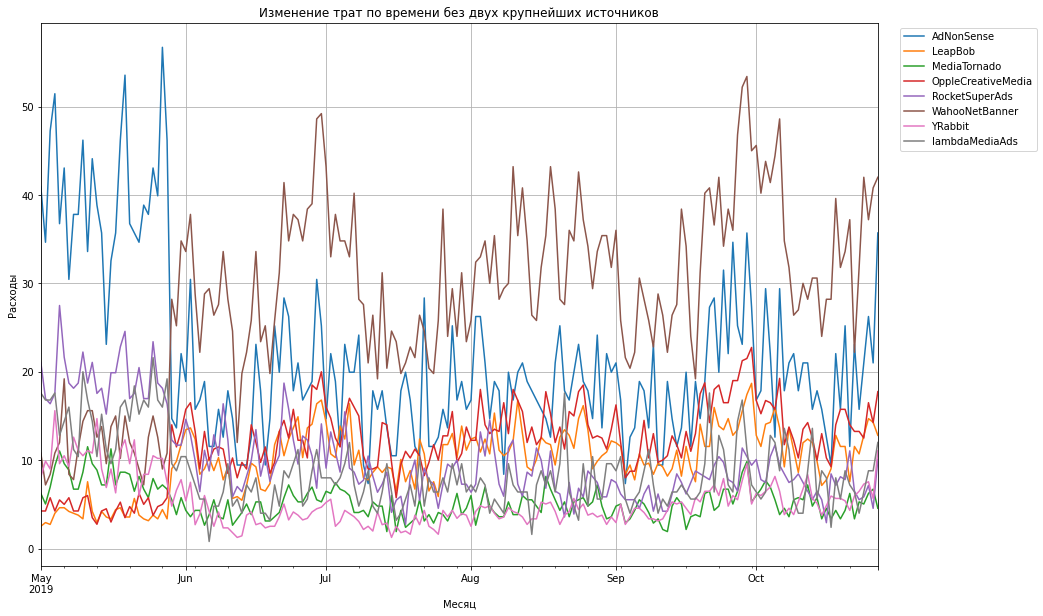

In [52]:
costs2 = costs[(costs.channel != 'FaceBoom') & (costs.channel != 'TipTop')]
costs2.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по времени без двух крупнейших источников')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()


In [53]:
profiles


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [54]:
# средний CAC по каналам привлечения
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending = False)
    .rename(columns={'acquisition_cost': 'cac'})
)
round(cac, 2)



,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


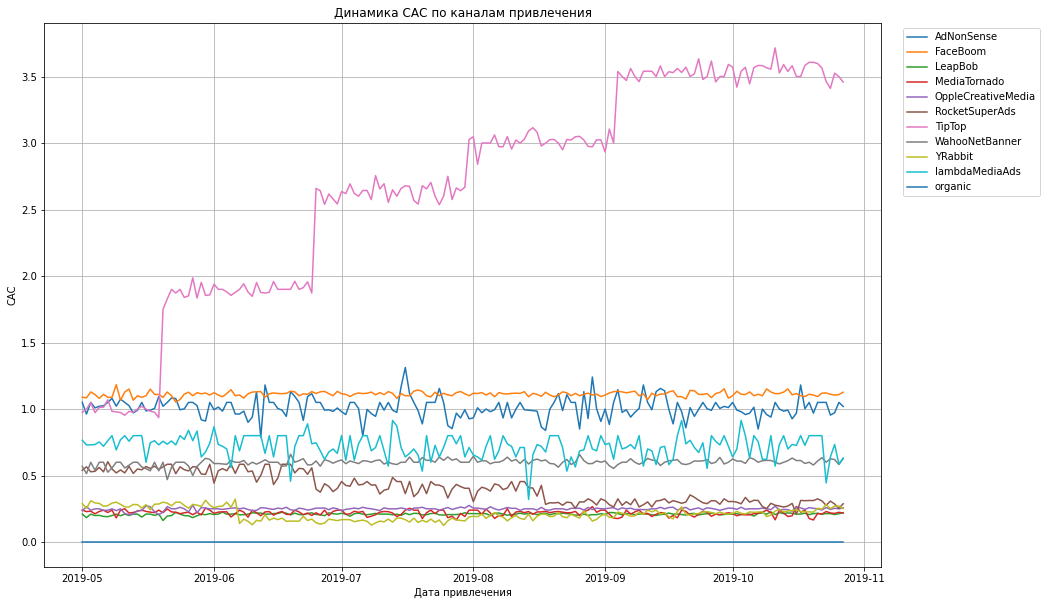

In [55]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()


### Вывод

Общая сумма расходов на маркетинг составила 105497.3 ед. Наибольше расходы составили на канал TipTop,FaceBoom. Расходы на остальные каналы существенно ниже, например, на третьем месте - WahooNetBanner. Последние места занимают канал YRabbit и MediaTornado. Каждый месяц с мая по сентябрь расходы на маркетинг росли все больше и больше. График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем. Траты на FaceBoom росли гораздо медленнее. Все остальные источники существенно уступают по объему расходов на маркетинг.

Стоимость привлечения органических пользователей во всех когортах, распределенных по каналам, равна нулю, потому что они не были привлечены за счет рекламы. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2.80 ед., из FaceBoom - 1.11 ед., из AdNonSense - 1.01 ед. Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop,FaceBoom и AdNonSense на их фоне значительно выделяется, т.к. расходы на одного пользователя росли почти каждый месяц. 


## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [56]:
# исключение органических пользователей из таблицы
profiles = profiles.query('channel != "organic"')

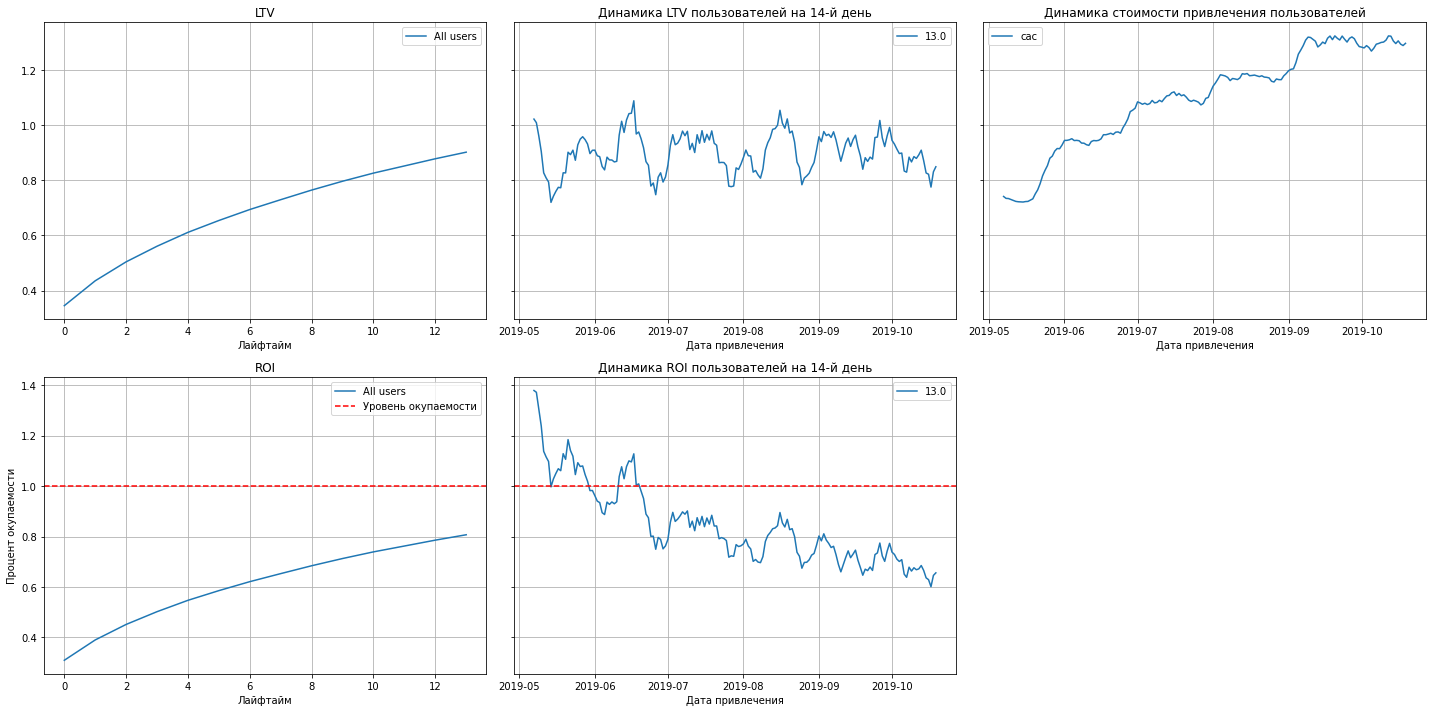

In [57]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков можно сделать вывод, что ROI находится ниже уровня окупаемости. Динамика ROI пользователей на 14-й день падает все больше со временем. Динамика стоимости привлечения пользователей постепенно увеличивалась. LTV достаточно стабильно растет

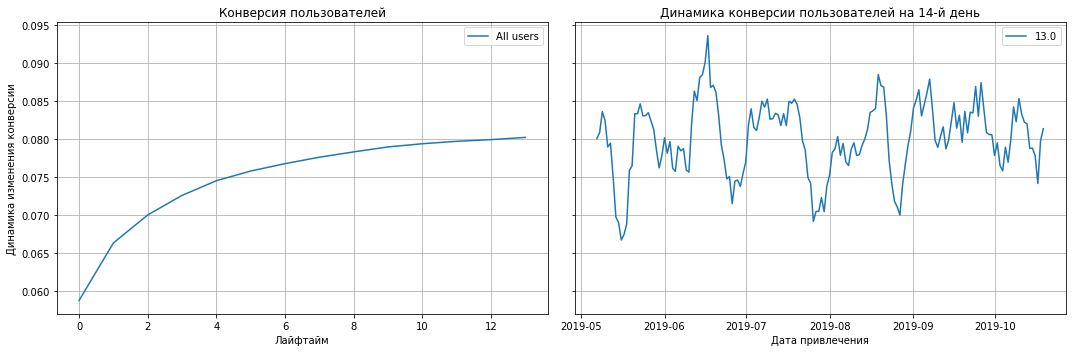

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


Из графика 1 можно сделать вывод, что конверсия росла до 6 лайфтайма, а затем стала стабильна. 

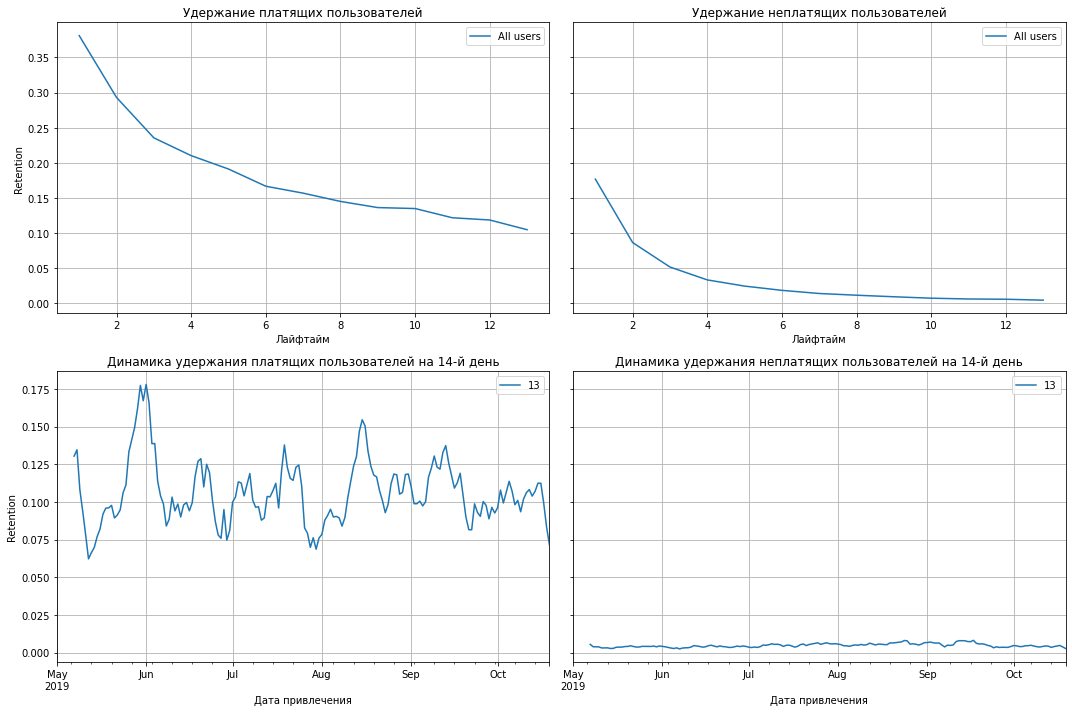

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Как мы видим - все пользователи плохо удерживаются. Чтоб понять причины, сделаем разбивку:

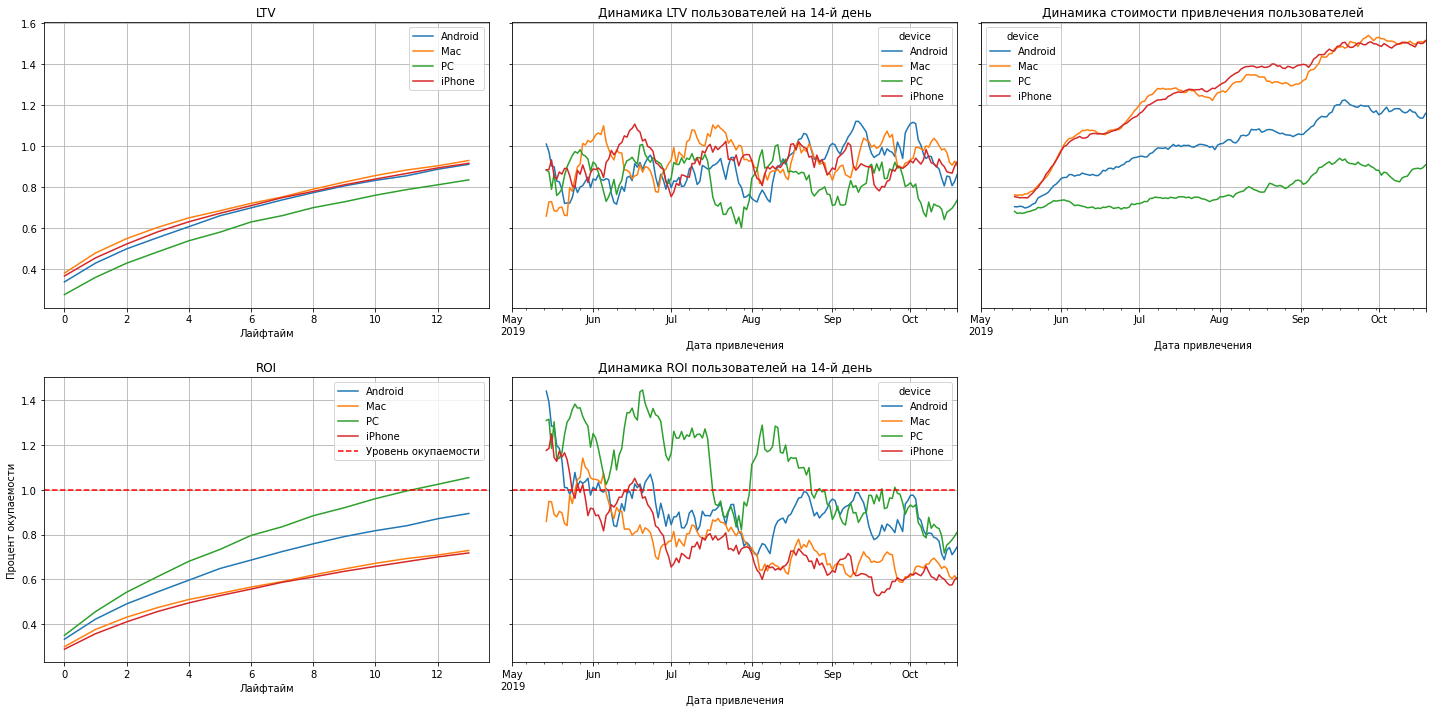

In [60]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV стабильно растёт. Выше уровня окупаемости по устройствам только PC. Но у PC стоимость привлечения стабильна, а вот e Mac и IPhone она резко растёт вверх.Значит можно сделать предварительный вывод, что пользователи Mac и IPhone плохо окупаются, но требуют много затрат на привлечение.

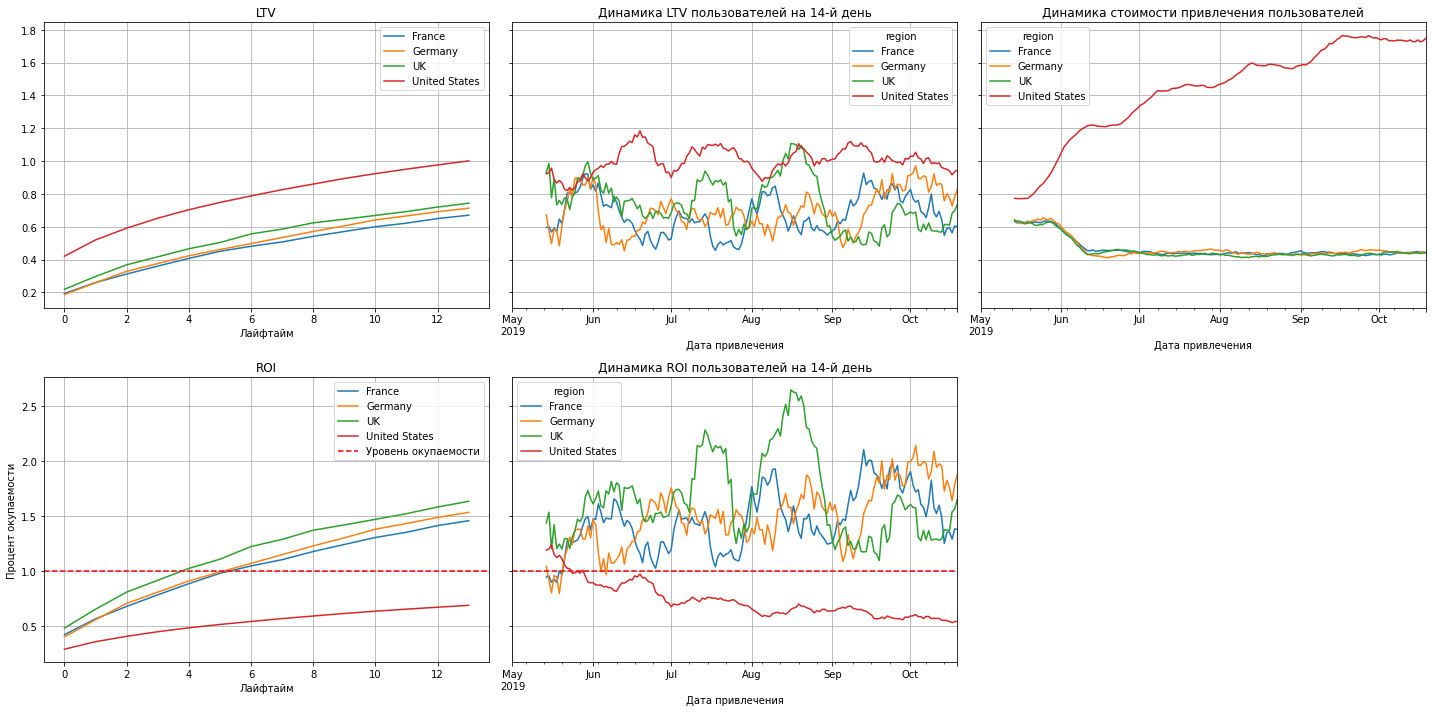

In [61]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Поьзователи из США(самая многочисленная когорта, в том числе платящая) не окупаются и на 14 день мы видим что их ROI падает.LTV США стабильно растёт, так же как и стоимость привлечения. При этом другие страны  окупаются, а стоимость привлечения почти не меняется

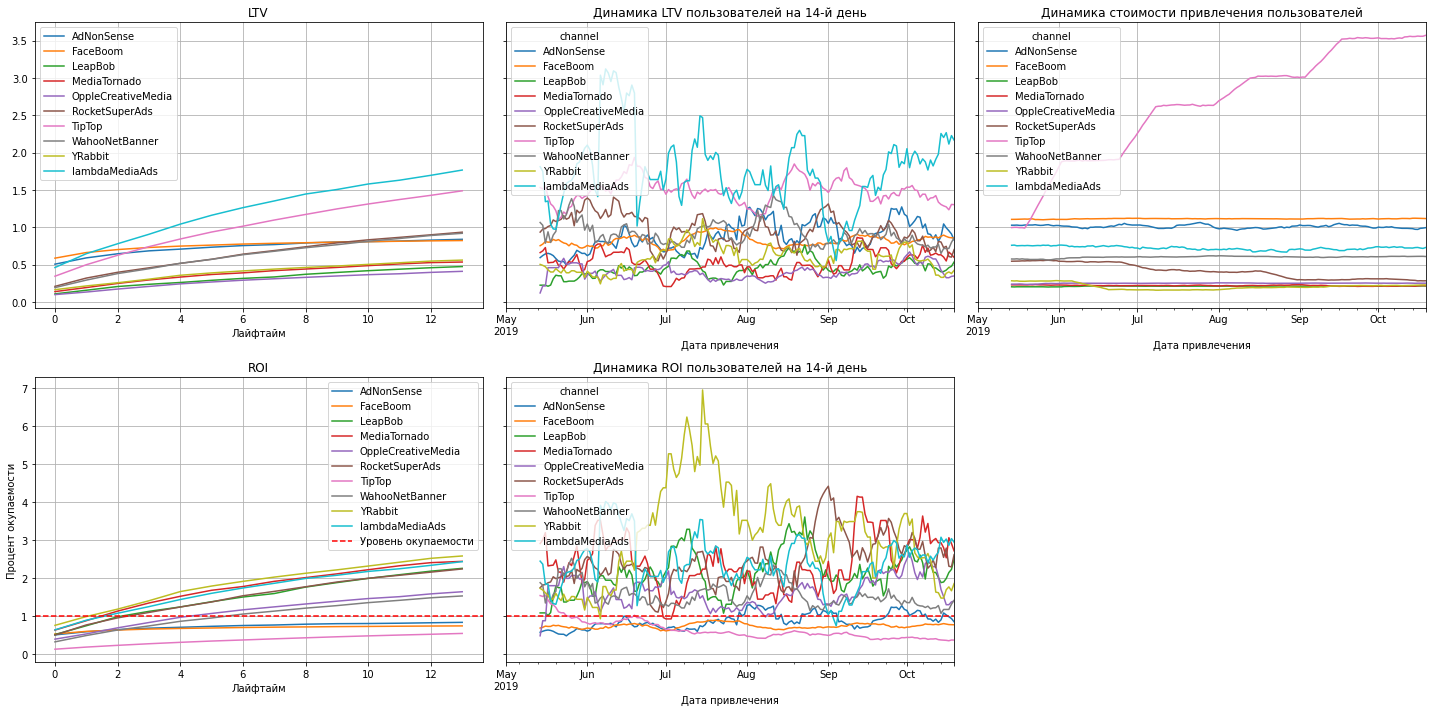

In [62]:
# смотрим окупаемость с разбивкой по каналу привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Ниже уровня окупаемости каналы: TipTop,FaceBoom, LambdaMediaAds. На 14 день не окупаются каналы TipTop и FaceBoom, а они самые "дорогие" каналы привлечения в нашем бюджете.У канала TipTop резко возросла стоимость привлечения пользователей , а другие каналы не повышали цены.

**Конверсия с разбивкой по странам**

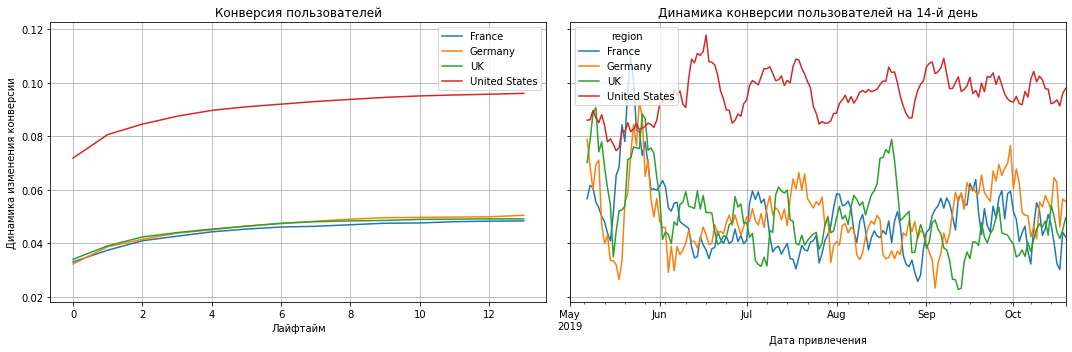

In [63]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод: самый высокий уровень конверсии в США**

**Удержание с разбивкой по странам**

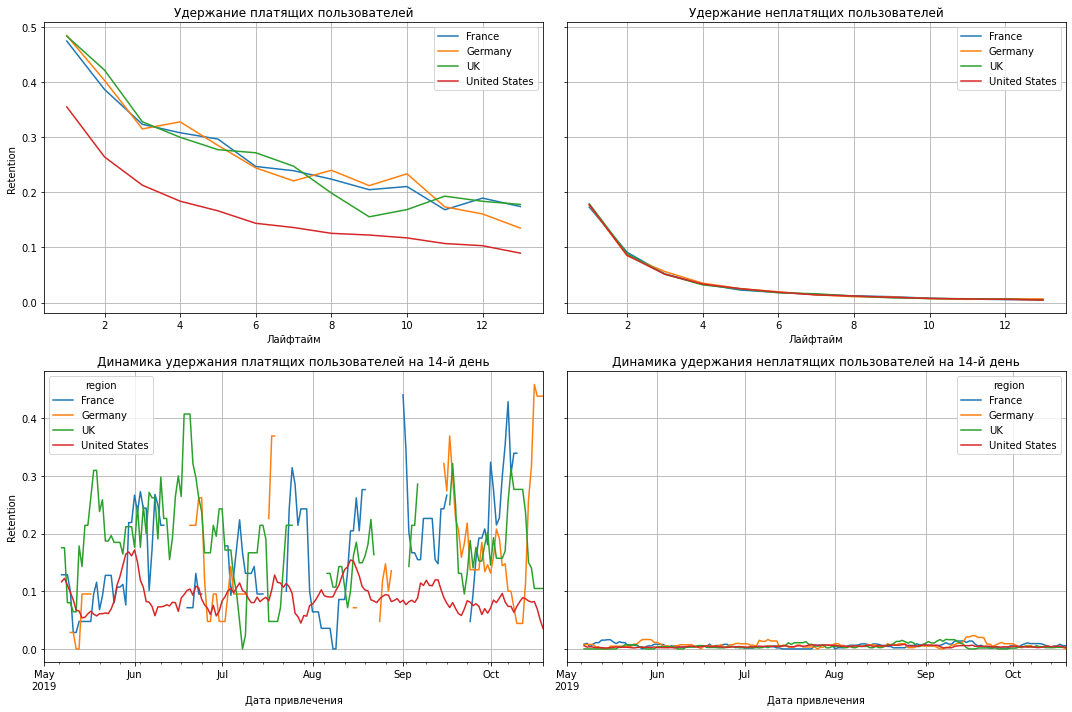

In [64]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод: в противовес высокой конверсии пользователей из США их низкое удержание.**

**Конверсия с разбивкой по устройствам**

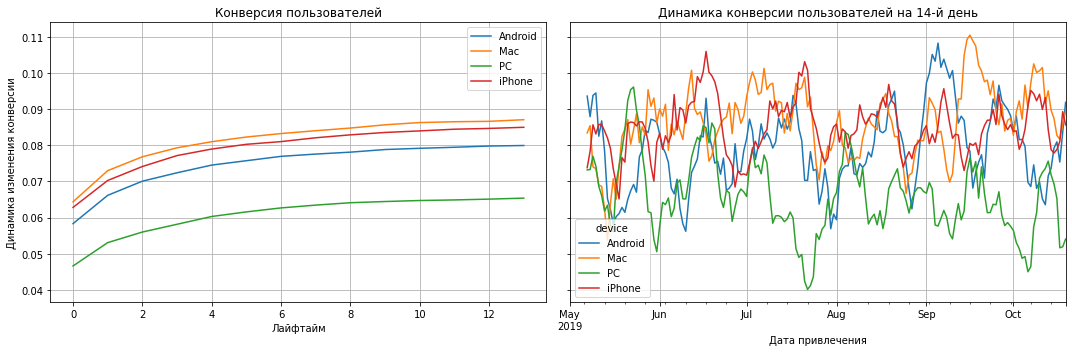

In [65]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод: ниже всего конверсия у пользователей PC**

**Удержание с разбивкой по устройтвам**

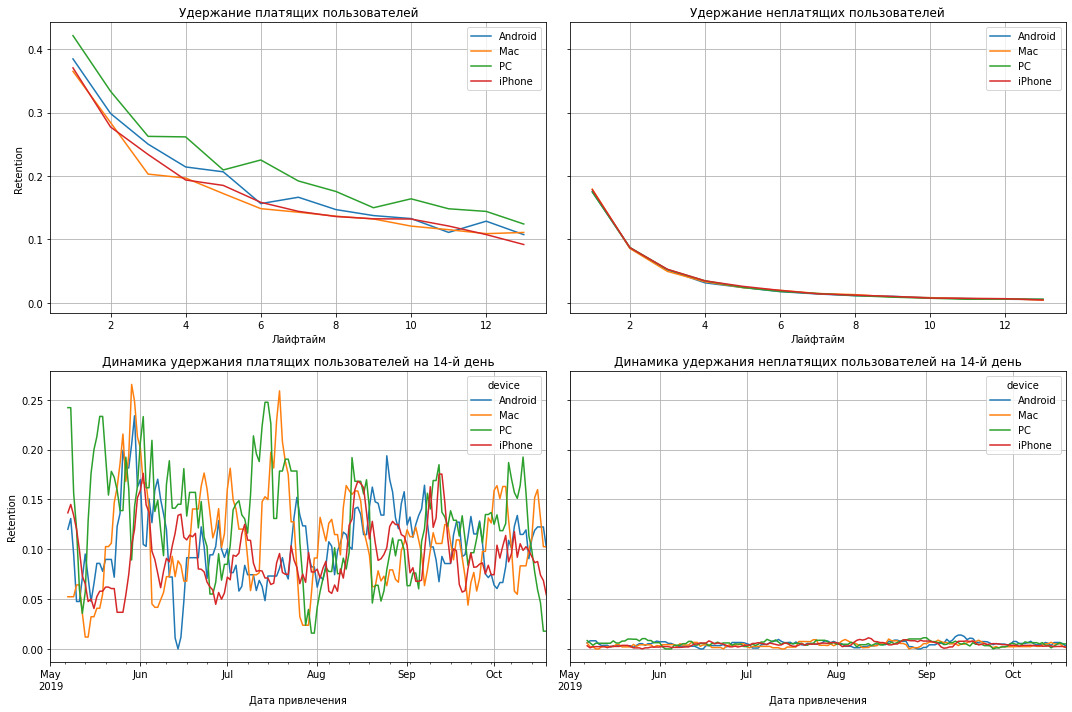

In [66]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод: удержание платящих пользователей выше всего у пользователей PC. Для неплатящих пользователей этот показатель ниже в сравнении с платящими и почти не отличается в зависимости от платформы.**

**Конверсия с разбвкой по каналам**

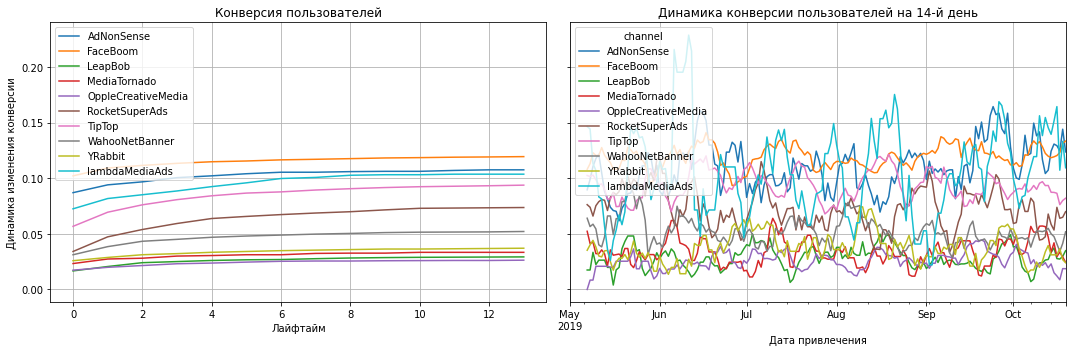

In [67]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Каналы привлечения AdNonSense и FaceBoom имеют наивысший показатель конверсии**

**Удержание с разбивкой по каналам.**

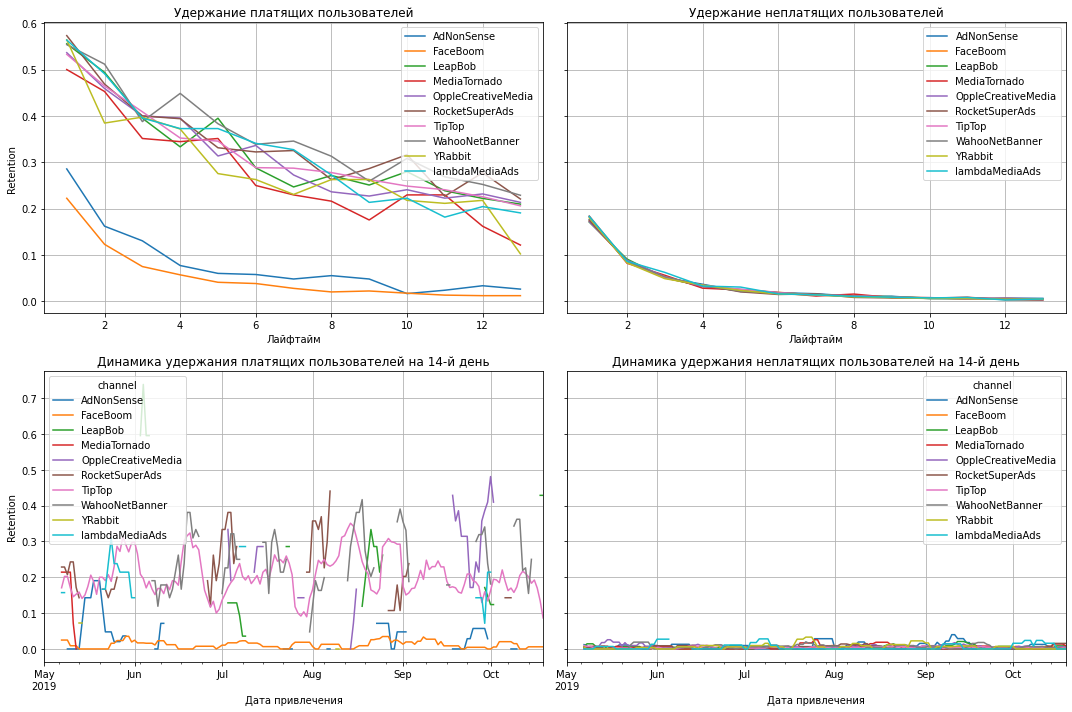

In [68]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод: но в то же время эти же каналы имеют самое низкое удержание.**

### Вывод
В целом, окупаемость рекламы со временем падает, а стоимость привлечения пользователей растет. В рассматриваемый период реклама в итоге не окупилась.

Из всех стран США оказались единственной страной, которая продемонстрировала убытки по ROI. Возрастающие расходы на привлечение клиентов не оправдались.

В разрезе по устройствам выявлено снижение динамики окупаемости к 14 дню у всех девайсов при росте стоимости привлечения пользователей. Mac и iPhone, а также Android показали результаты ниже уровня окупаемости, при этом у них же выявлены наибольшие расходы на привлечение. В США пользователи всех устройств не принесли достаточно денег, чтобы реклама на них окупилась.

Чрезмерные расходы обнаружены на канал TipTop,AdNonSense,FaceBoom которые в результате не показали положительных результатов по ROI.

Проблемы окупаемости могут быть вызваны высокой стоимостью привлечения. У канала TipTop стоимость выросла в 3.5 раза с мая по октябрь. Примерно, в то же время, когда начался рост CAC, ROI опустился ниже уровня окупаемости. У канала FaceBoom высокая конверсия,но проблема с удержанием пользователей.


## Общий вывод

### Проделана работа:
- Изучены данные и выполнена предобработка. В данных пропуски и дубликаты не обнаружены.Cтолбцы с датой и временем приведены к типу datetime.
- Задали функции для расчёта и анализа LTV, ROI, удержания и конверсии.
- Составили профили пользователей. Определена минимальная и максимальная дата привлечения пользователей.
- Выяснили, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построили таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Выяснили, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построили таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Выяснили рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построли таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
- Посчитана общая сумма расходов на маркетинг.
- Выяснили, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на одном графике.
- Используя профили пользователей узнали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
- Построили графики LTV и ROI,а также графики динамики LTV, CAC и ROI.

### Вывод по проекту и рекомендации:
В исследовании проанализированы данные по пользователям приложения Procrastinate Pro+ из США, Великобритании, Франции и Германии. США существенно опережают другие страны по количеству пользователей, в т.ч. платящих. iPhonе лидирует среди устройств, занимая самую большую долю. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2.80 ед., из FaceBoom - 1.11 ед., из AdNonSense - 1.01 ед. Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop,FaceBoom и AdNonSense на их фоне значительно выделяется, т.к. расходы на одного пользователя росли почти каждый месяц

В целом, реклама в привлечение пользователей не окупилась. При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. Стоимость рекламы должна быть оптимальной. Например, в разрезе по устройствам расходы окупились по пользователям PC, в разрезе по странам - из Франции, Германии и Великобритании. ROI 7 каналов из 10 оказались выше уровня окупаемости.

Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется сократить финансирование на маркетинг там, где стоимость привлечения слишком большая - это расходы на канал TipTop, FaceBoom в США, так как пользователи из США самая многочисленная когорта(и самая платящая).  Направить финансирование на другие каналы привлечения, а именно RocketSuperAds, YRabbit, MediaTornado. 